In [2]:
import requests
from PIL import Image

In [17]:
subscription_key = '004557bd9162439b99eec4da1957cc75'

In [18]:
assert subscription_key

In [19]:
face_api_url = 'https://20201204tigued.cognitiveservices.azure.com/face/v1.0/detect'


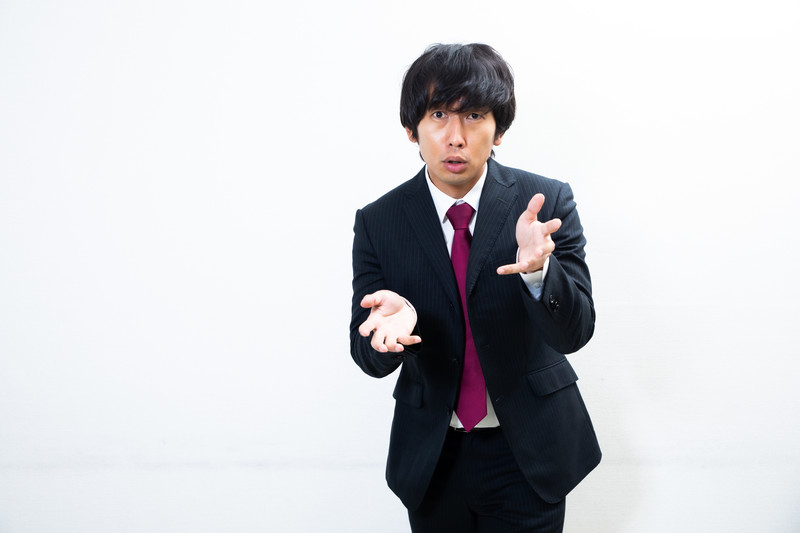

In [31]:
img = Image.open('sample1.jpg')
img

In [21]:
# バイナリファイルに変換する必要がある
with open('sample1.jpg', 'rb') as f:
    binary_img = f.read()

In [22]:
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key}

params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}# 単純な顔検出ならOpenCVでもできるが、このAPIだと色々判別できる

res = requests.post(face_api_url, params=params,
                         headers=headers, data=binary_img)
# tutorialでは画像のurlを送っているが(json={"url": image_url})、
# 今回はバイナリイメじを送る

In [23]:
res

<Response [200]>

In [24]:
result = res.json()
result

[{'faceId': '8f8bc01c-4cab-4597-9e8f-79aa24cbca88',
  'faceRectangle': {'top': 92, 'left': 410, 'width': 91, 'height': 91},
  'faceAttributes': {'smile': 0.0,
   'headPose': {'pitch': -10.5, 'roll': 1.2, 'yaw': 1.5},
   'gender': 'male',
   'age': 34.0,
   'facialHair': {'moustache': 0.1, 'beard': 0.1, 'sideburns': 0.1},
   'glasses': 'NoGlasses',
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.012,
    'happiness': 0.0,
    'neutral': 0.186,
    'sadness': 0.001,
    'surprise': 0.8},
   'blur': {'blurLevel': 'low', 'value': 0.0},
   'exposure': {'exposureLevel': 'goodExposure', 'value': 0.53},
   'noise': {'noiseLevel': 'low', 'value': 0.0},
   'makeup': {'eyeMakeup': False, 'lipMakeup': False},
   'accessories': [],
   'occlusion': {'foreheadOccluded': False,
    'eyeOccluded': False,
    'mouthOccluded': False},
   'hair': {'bald': 0.03,
    'invisible': False,
    'hairColor': [{'color': 'black', 'confidence': 1.0},
     {'color': 'brown', 'conf

In [32]:
rect = result[0]['faceRectangle']# 一つだけしか顔が検出されていないので[0]

In [28]:
from PIL import ImageDraw

In [33]:
draw = ImageDraw.Draw(img)

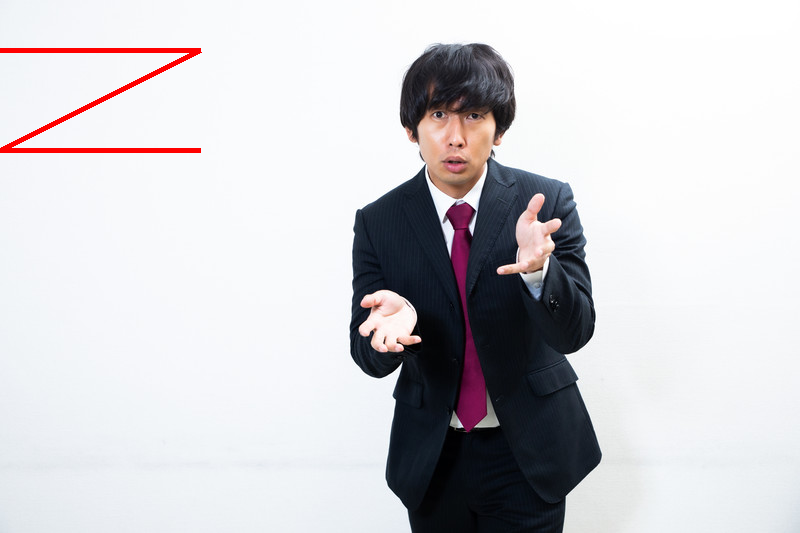

In [30]:
draw.line([(0, 50), (200, 50), (0, 150), (200, 150)], fill= 'red', width=5)
img

In [35]:
draw.rectangle([(rect['left'], rect['top']), (rect['left']+rect['width'], rect['top']+rect['height'])], fill=None, outline='green', width=5)

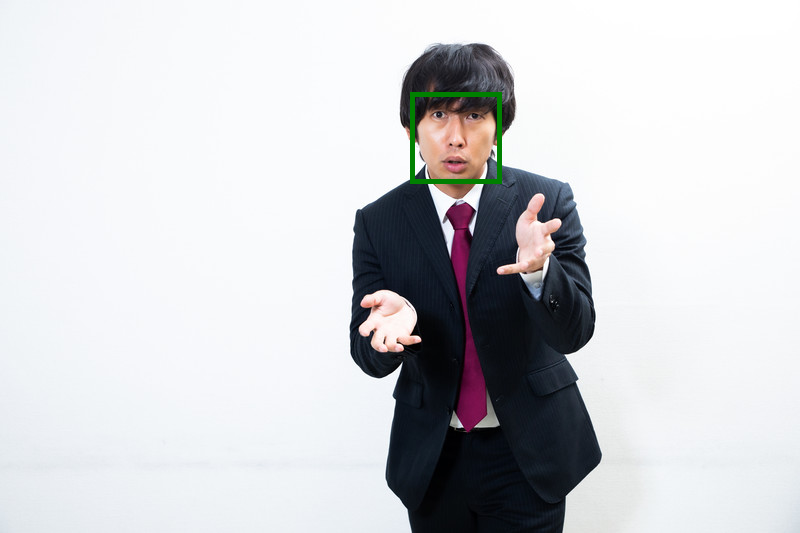

In [36]:
img

In [41]:
import requests
from PIL import Image
from PIL import ImageDraw
import io #inputoutputの略
subscription_key = '004557bd9162439b99eec4da1957cc75'
assert subscription_key
face_api_url = 'https://20201204tigued.cognitiveservices.azure.com/face/v1.0/detect'
img = Image.open('sample1.jpg')

with io.BytesIO() as output:
    img.save(output, format='JPEG')
    binary_img = output.getvalue() # バイナリ取得
# バイナリファイルに変換する必要がある
#with open('sample1.jpg', 'rb') as f:
#    binary_img = f.read()
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key}

params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}# 単純な顔検出ならOpenCVでもできるが、このAPIだと色々判別できる

res = requests.post(face_api_url, params=params,
                         headers=headers, data=binary_img)
# tutorialでは画像のurlを送っているが(json={"url": image_url})、
# 今回はバイナリイメじを送る
results = res.json()
for result in results:
    rect = result['faceRectangle']# 一つだけしか顔が検出されていないので[0]
    draw = ImageDraw.Draw(img)
    draw.rectangle([(rect['left'], rect['top']), (rect['left']+rect['width'], rect['top']+rect['height'])], fill=None, outline='green', width=5)

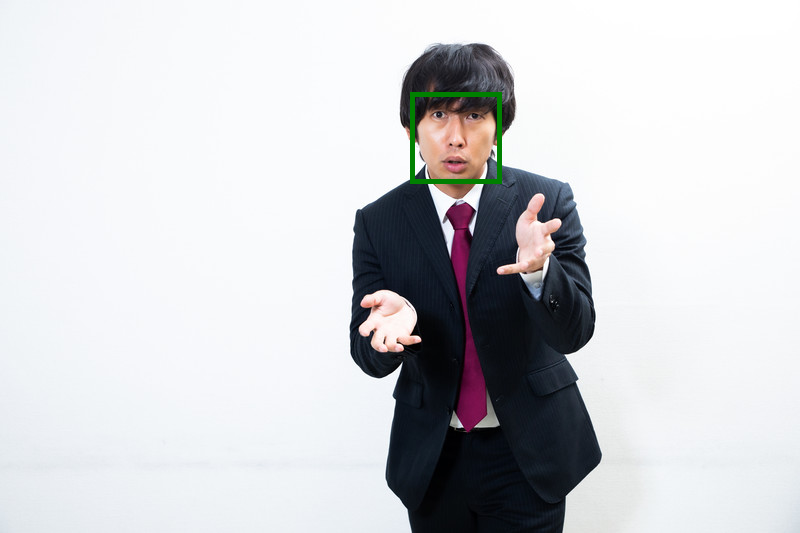

In [42]:
img

In [44]:
import io #inputoutputの略
with io.BytesIO() as output:
    img.save(output, format='JPEG')
    binary_img = output.getvalue() # バイナリ取得

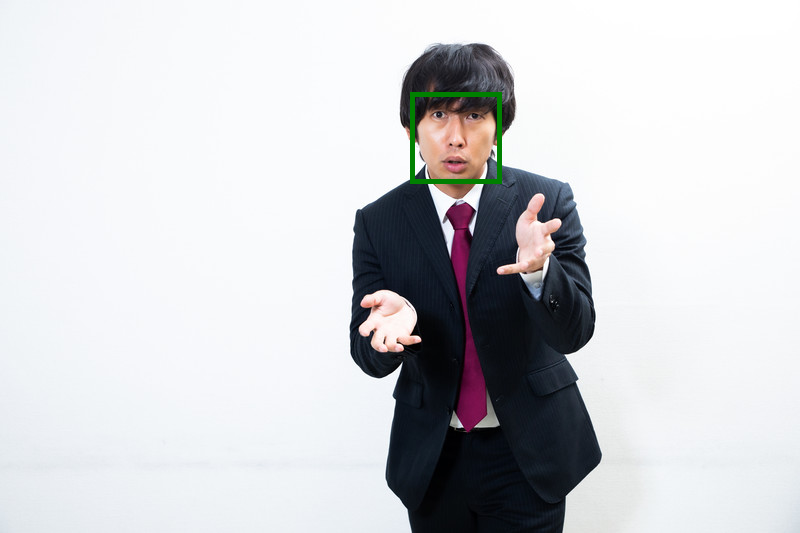